In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ttest_ind
import math
from scipy.stats import binom

In [2]:
estimate_partial = pd.read_csv("Paper1_data_csv\\Partial\\Partial_table_estimate.csv")
learning_partial = pd.read_csv("Paper1_data_csv\\Partial\\Partial_table_learning.csv")
transfer_partial = pd.read_csv("Paper1_data_csv\\Partial\\Partial_table_transfer.csv")
estimate_complete = pd.read_csv("Paper1_data_csv\\Complete\\Complete_table_estimate.csv")
learning_complete = pd.read_csv("Paper1_data_csv\\Complete\\Complete_table_learning.csv")
transfer_complete = pd.read_csv("Paper1_data_csv\\Complete\\Complete_table_transfer.csv")


In [3]:
def rate_generator (data):

    (A1, B) = (1, 3)
    (A2, C) = (2, 4)

    rate_per_temp_mnn=[]
    rate_A1=0
    rate_A2=0
    rate_C =0
    rate_B =0
    for k in range (35):
        for j in range (30):
            for i in range (10):
                if data.loc[i+10*j+300*k,'chosen']==A1:
                    rate_A1+=1
                elif data.loc[i+10*j+300*k,'chosen']==A2:
                    rate_A2+=1 
                elif data.loc[i+10*j+300*k,'chosen']==C:
                    rate_C+=1
                elif data.loc[i+10*j+300*k,'chosen']==B:
                    rate_B+=1     
            Sum_rate=rate_A1+rate_A2+rate_B+rate_C
            if Sum_rate != 0:
                rate_A1=rate_A1/Sum_rate
                rate_A2=rate_A2/Sum_rate
                rate_C=rate_C/Sum_rate
                rate_B=rate_B/Sum_rate

                rate_per_trial_tempe_mn={"ID":j,"rateA1":rate_A1,"rateA2":rate_A2,"rateB":rate_B,"rateC":rate_C}

                rate_per_temp_mnn+=[rate_per_trial_tempe_mn]
            
            rate_A1=0
            rate_A2=0
            rate_C=0
            rate_B=0
            
    return pd.DataFrame(rate_per_temp_mnn)

In [4]:
learning_partial_rate = rate_generator(learning_partial)

In [5]:
learning_partial_rate.drop("ID",axis=1).sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
704    1.0
705    1.0
706    1.0
707    1.0
708    1.0
Length: 709, dtype: float64

In [6]:
learning_rates_partial = rate_generator(learning_partial)
# transfer_rates_partial = rate_generator(transfer_partial)
learning_rates_complete = rate_generator(learning_complete)
# transfer_rates_complete = rate_generator(transfer_complete)

In [7]:
learning_rates_partial.tail(50)

,ID,rateA1,rateA2,rateB,rateC
659,8,0.400000,0.400000,0.1,0.100000
660,9,0.300000,0.400000,0.2,0.100000
661,10,0.500000,0.400000,0.0,0.100000
662,11,0.444444,0.444444,0.0,0.111111
663,12,0.400000,0.100000,0.1,0.400000
664,13,0.300000,0.200000,0.2,0.300000
665,14,0.300000,0.400000,0.2,0.100000
666,15,0.500000,0.400000,0.0,0.100000
667,16,0.500000,0.500000,0.0,0.000000
668,17,0.500000,0.400000,0.0,0.100000


In [8]:
# merging trials by its mean

learning_rates_partial.sort_values("ID", inplace=True)

data_to_plot_partial = pd.DataFrame([])

for i in range(30):
    data = learning_rates_partial.loc[learning_rates_partial.ID == i]
    data = data.mean(axis=0)
    data_to_plot_partial = pd.concat([data_to_plot_partial,data],axis=1) 

data_to_plot_partial = data_to_plot_partial.T
# data_to_plot_partial = data_to_plot_partial.drop(["count","ID"],axis=1)
data_to_plot_partial = data_to_plot_partial.set_index("ID")
data_to_plot_partial

,rateA1,rateA2,rateB,rateC
ID,,,,
0.0,0.276825,0.291429,0.221587,0.210159
1.0,0.293968,0.292698,0.209206,0.204127
2.0,0.328889,0.361270,0.172698,0.137143
3.0,0.337143,0.371429,0.162857,0.128571
4.0,0.342857,0.388571,0.157143,0.111429
5.0,0.358413,0.433016,0.140000,0.068571
6.0,0.345714,0.414286,0.154286,0.085714
7.0,0.382857,0.405714,0.117143,0.094286
8.0,0.362857,0.414286,0.137143,0.085714


In [9]:
learning_rates_complete.sort_values("ID" ,inplace=True)

data_to_plot_complete = pd.DataFrame([])
for i in range(30):
    h=learning_rates_complete.loc[:,"ID"]==i 
    S=learning_rates_complete.loc[h]
    S=S.mean(axis=0)
    data_to_plot_complete = pd.concat([data_to_plot_complete,S],axis=1)

data_to_plot_complete = data_to_plot_complete.T
# data_to_plot_complete = data_to_plot_complete.drop(["count","ID"],axis=1)
data_to_plot_complete = data_to_plot_complete.set_index("ID")

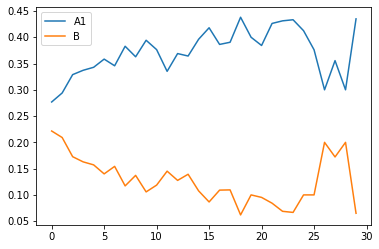

In [11]:
plt.plot(data_to_plot_partial.index,data_to_plot_partial["rateA1"],label = "A1")
plt.plot(data_to_plot_partial.index,data_to_plot_partial["rateB"],label = "B")
plt.legend()
plt.show()

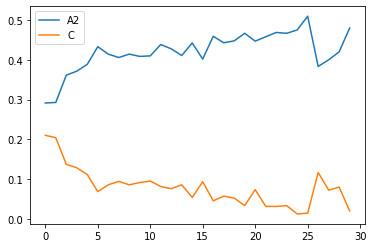

In [12]:
plt.plot(data_to_plot_partial.index,data_to_plot_partial["rateA2"],label = "A2")
plt.plot(data_to_plot_partial.index,data_to_plot_partial["rateC"],label = "C")
plt.legend()
plt.show()

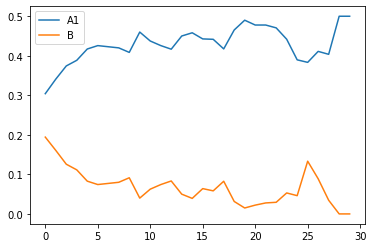

In [13]:
plt.plot(data_to_plot_complete.index,data_to_plot_complete["rateA1"],label = "A1")
plt.plot(data_to_plot_complete.index,data_to_plot_complete["rateB"],label = "B")
plt.legend()
plt.show()

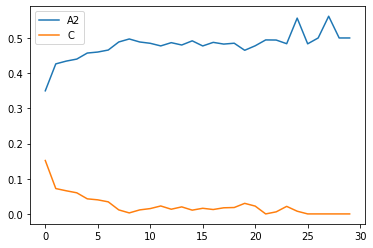

In [14]:
plt.plot(data_to_plot_complete.index,data_to_plot_complete["rateA2"],label = "A2")
plt.plot(data_to_plot_complete.index,data_to_plot_complete["rateC"],label = "C")
plt.legend()
plt.show()

In [15]:
y_A1_mean_partial,y_A2_mean_partial,y_B_mean_partial,y_C_mean_partial = data_to_plot_partial.rateA1.mean(), data_to_plot_partial.rateA2.mean(), data_to_plot_partial.rateB.mean(), data_to_plot_partial.rateC.mean()
y_A1_mean_complete,y_A2_mean_complete,y_B_mean_complete,y_C_mean_complete = data_to_plot_complete.rateA1.mean(), data_to_plot_complete.rateA2.mean(), data_to_plot_complete.rateB.mean(), data_to_plot_complete.rateC.mean()

<BarContainer object of 4 artists>

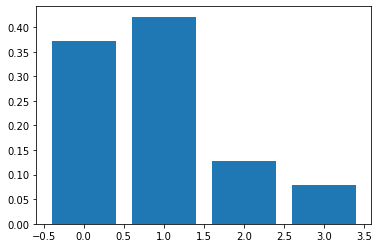

In [16]:
plt.bar([0,1,2,3],height=[y_A1_mean_partial,y_A2_mean_partial,y_B_mean_partial,y_C_mean_partial])

<BarContainer object of 4 artists>

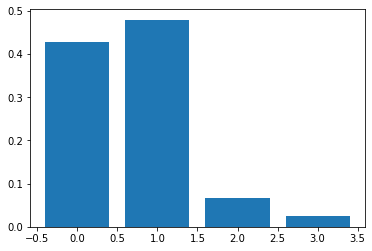

In [17]:
plt.bar([0,1,2,3],height=[y_A1_mean_complete,y_A2_mean_complete,y_B_mean_complete,y_C_mean_complete])

In [18]:
learning_rates2_partial = learning_rates_partial.drop(["ID"], axis=1)
learning_rates2_complete = learning_rates_complete.drop(["ID"], axis=1)

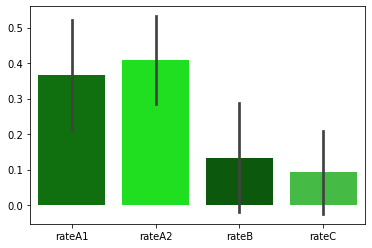

In [19]:
# ci="sd" for confidence
ax = sns.barplot(data=learning_rates2_partial, ci="sd",palette=["green","lime","darkgreen","limegreen"])

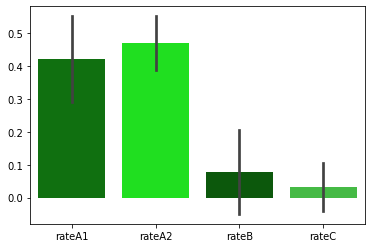

In [20]:
ax = sns.barplot(data=learning_rates2_complete, ci="sd",palette=["green","lime","darkgreen","limegreen"])

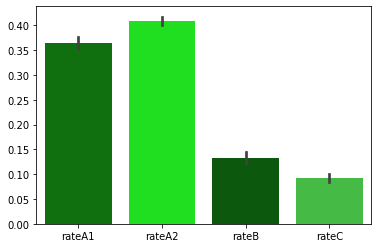

In [21]:
ax = sns.barplot(data=learning_rates2_partial,palette=["green","lime","darkgreen","limegreen"])

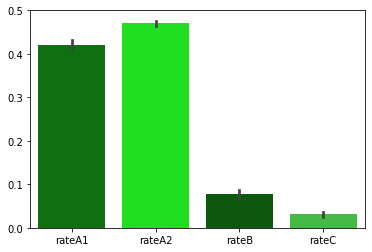

In [22]:
ax = sns.barplot(data=learning_rates2_complete,palette=["green","lime","darkgreen","limegreen"])

In [23]:
learning_rates_complete

,ID,rateA1,rateA2,rateB,rateC
0,0,0.3,0.3,0.2,0.2
693,0,0.5,0.4,0.0,0.1
300,0,0.3,0.4,0.2,0.1
39,0,0.5,0.2,0.0,0.3
416,0,0.3,0.4,0.2,0.1
...,...,...,...,...,...
109,29,0.5,0.5,0.0,0.0
499,29,0.5,0.5,0.0,0.0
667,29,0.5,0.5,0.0,0.0
415,29,0.5,0.5,0.0,0.0


<BarContainer object of 4 artists>

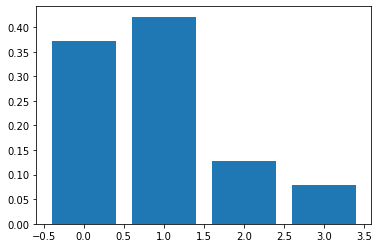

In [24]:
plt.bar([0,1,2,3],height=[y_A1_mean_partial,y_A2_mean_partial,y_B_mean_partial,y_C_mean_partial])

<BarContainer object of 2 artists>

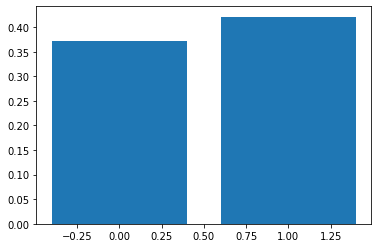

In [25]:
plt.bar([0,1],height=[y_A1_mean_partial,y_A2_mean_partial])

In [26]:
y_A1_partial,y_A2_partial,y_B_partial,y_C_partial = data_to_plot_partial.rateA1, data_to_plot_partial.rateA2, data_to_plot_partial.rateB, data_to_plot_partial.rateC
y_A1_complete,y_A2_complete,y_B_complete,y_C_complete = data_to_plot_complete.rateA1, data_to_plot_complete.rateA2, data_to_plot_complete.rateB, data_to_plot_complete.rateC

<BarContainer object of 2 artists>

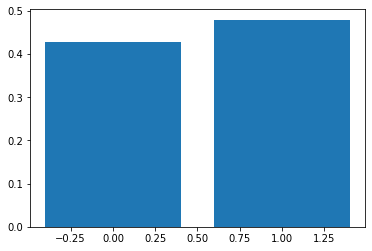

In [27]:
plt.bar([0,1],height=[y_A1_mean_complete,y_A2_mean_complete])

In [28]:
t_stat_partial, p_val_partial = ttest_ind(y_A2_partial,y_A1_partial)
p_val_partial


0.0001307703055104325

In [29]:
t_stat_complete, p_val_complete = ttest_ind(y_A2_complete,y_A1_complete)
p_val_complete


1.318737580572685e-05

In [30]:
p_val_partial - p_val_complete 


0.00011758292970470564

In [31]:
mean, var, skew, kurt = binom.stats(y_A1_mean_partial, y_A2_mean_partial, moments='mvsk')

In [32]:
from scipy.special import binom, comb
bio_par = binom(y_A1_partial, y_A2_partial).mean()
bio_par

0.9720900412845634

In [33]:
bio_comp = binom(y_A1_complete, y_A2_complete).mean()
bio_comp

0.96880737105371

In [34]:
bio_comp - bio_par

-0.0032826702308534905

In [35]:
var_A1 = np.array(y_A1_partial).var()
var_A2 = np.array(y_A2_partial).var()
var_C = np.array(y_C_partial).var()
var_B = np.array(y_B_partial).var()
T = ttest_ind(y_A1_partial,y_A2_partial)
T

TtestResult(statistic=-4.098914960272108, pvalue=0.0001307703055104325, df=58.0)

In [36]:
T.confidence_interval()

ConfidenceInterval(low=-0.07362019065195625, high=-0.025308208541665034)

In [37]:
T = ttest_ind(y_A1_complete,y_A2_complete)
T

TtestResult(statistic=-4.762384390269549, pvalue=1.318737580572685e-05, df=58.0)

In [38]:
T.confidence_interval()
T

TtestResult(statistic=-4.762384390269549, pvalue=1.318737580572685e-05, df=58.0)